In [210]:
import igraph 
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import colors
%matplotlib inline

## Read data to igraph

In [211]:
node_set_df = pd.read_csv("igraph_tutorial/splice_graph.nodes", sep='\t')

In [212]:
node_set_df["igraph_index"] = range(node_set_df.shape[0]) #add igraph index starts from 0

In [213]:
node_set_df.head()

,name,start,end,sum_coverage,length,coverage,igraph_index
0,source,0,0,0.00,1,0.000000,0
1,1,147928397,147928578,2548.00,182,14.000000,1
2,2,147936627,147936686,1415.50,60,23.591667,2
3,3,147938714,147938817,3082.25,104,29.637020,3
4,4,147943438,147943544,3201.00,107,29.915888,4


In [214]:
## Load edges set: index by igraph_index (integers start from 0)
edge_set_df = pd.read_csv("igraph_tutorial/splice_graph.edges", sep='\t')
edge_set_df.head()

,from,to,weight
0,0,1,1
1,1,2,1
2,2,3,1
3,3,4,1
4,4,5,1


## Create igraph

In [215]:
g = igraph.Graph(directed=True)

In [216]:
n_vertices = len(node_set_df)

# add vertices
g.add_vertices(n_vertices)
print(g)

IGRAPH D--- 19 0 --


In [217]:
edges = []
    
# add edges to the graph
g.add_edges(zip(edge_set_df['from'], edge_set_df['to']))
print(g)

IGRAPH D--- 19 22 --
+ edges:
0->1 1->2 2->3 3->4 4->5 5->6 4->6 6->7 7->8 8->9 0->10 10->11 9->11 11->12
11->13 13->14 14->15 15->16 0->17 12->18 16->18 17->18


In [218]:
# add ´node_info' to vertices in the graph
g.vs['name'] = node_set_df['name'].tolist()
g.vs['start'] = node_set_df['start'].tolist()
g.vs['end'] = node_set_df['end'].tolist()
g.vs['sum_coverage'] = node_set_df['sum_coverage'].tolist()
g.vs['length'] = node_set_df['length'].tolist()
g.vs['coverage'] = node_set_df['coverage'].tolist()

# add weights to edges in the graph
g.es['weight'] = edge_set_df['weight']

In [221]:
layout = g.layout_kamada_kawai()
layout = g.layout("kamada_kawai")
layout = g.layout_reingold_tilford(root=[2])
layout = g.layout("tree", root=[2])
layout = g.layout("tree")
#igraph.plot(g, layout = layout)

In [222]:
viridis_cmap = cm.get_cmap('viridis', 256)
scaled_coverage = colors.Normalize(vmin=0., vmax=max(g.vs['coverage']))
g.vs["label"] = g.vs["name"]
#g.vs["color"] = [viridis_cmap(scaled_coverage(xx)) for xx in g.vs['coverage']]
g.vs["color"] = 'red'
# igraph.plot(g, layout = layout, bbox = (500, 500), margin = 20)

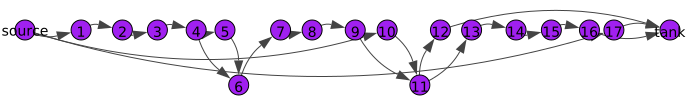

In [223]:
from igraph_tutorial.graph_utils import *
igraph.autocurve(g, attribute='curved', default=0.1)
x = -0.2
g.es['curved'] = [x if i % 2 else -x for i in range(len(edge_set_df))]
visual_style = {}
visual_style["vertex_size"] = 20
# visual_style["vertex_color"] = [viridis_cmap(scaled_coverage(xx)) if xx != 0 else 'red' for xx in g.vs['coverage']]
visual_style["vertex_color"] = 'purple'
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = g.es['weight']
#visual_style["layout"] = layout
visual_style["layout"] = layout_splice_graph(g)
visual_style["bbox"] = (700, 100)
visual_style["margin"] = np.array([50, 60, 60, 30])*0.5
igraph.plot(g, autocurve=True, **visual_style)

# -------------------------------------------------------------------------------------


# Demo 2: Find the maximum flow from source to sink (tank)
### Compute the maximum flow using graph algorithm from iGraph

In [224]:
source_node = g.vs.find(name="source").index
sink_node =  g.vs.find(name="tank").index

In [225]:
maxflow = g.maxflow(source_node, sink_node, g.es['weight'])

In [226]:
print(maxflow.flow)

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [227]:
maxflow.value

3.0

In [228]:
edgeset_index_tupple = [e.tuple for e in g.es]
edgeset_index_tupple

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (4, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (0, 10),
 (10, 11),
 (9, 11),
 (11, 12),
 (11, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (0, 17),
 (12, 18),
 (16, 18),
 (17, 18)]

In [229]:
# Print flow by igraph index:
for k in range(len(edgeset_index_tupple)):
    print('%s -> %s: %g' % (edgeset_index_tupple[k][0], edgeset_index_tupple[k][1], maxflow.flow[k]))

0 -> 1: 1
1 -> 2: 1
2 -> 3: 1
3 -> 4: 1
4 -> 5: 0
5 -> 6: 0
4 -> 6: 1
6 -> 7: 1
7 -> 8: 1
8 -> 9: 1
0 -> 10: 1
10 -> 11: 1
9 -> 11: 1
11 -> 12: 1
11 -> 13: 1
13 -> 14: 1
14 -> 15: 1
15 -> 16: 1
0 -> 17: 1
12 -> 18: 1
16 -> 18: 1
17 -> 18: 1


In [164]:
# Print flow by splice graph name
for k in range(len(edgeset_index_tupple)):
    i = edgeset_index_tupple[k][0]
    j = edgeset_index_tupple[k][1]
    print('%s -> %s: %g' % (g.vs[i]["name"], g.vs[j]["name"], maxflow.flow[k]))

source -> 1: 1
1 -> 2: 1
2 -> 3: 1
3 -> 4: 1
4 -> 5: 0
5 -> 6: 0
4 -> 6: 1
6 -> 7: 1
7 -> 8: 1
8 -> 9: 1
source -> 10: 1
10 -> 11: 1
9 -> 11: 1
11 -> 12: 1
11 -> 13: 1
13 -> 14: 1
14 -> 15: 1
15 -> 16: 1
source -> 17: 1
12 -> tank: 1
16 -> tank: 1
17 -> tank: 1


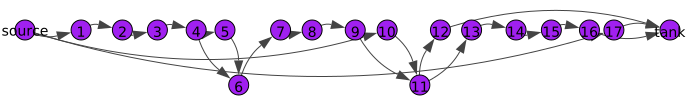

In [165]:
igraph.plot(g, autocurve=True, **visual_style)

### Using LP formulation and solve it with Gurobi

#### Model Formulation

##### Sets and Indices

- $G(V,E)$: Splice graph with vertex set $V$ and edge set $E$
- $s$ is source
- $t$ is sink

##### Parameters

$c_{uv}$: Capacity of edge $(u, v) \in E$

##### Variables

$f_{uv}$: Flow on edge $(u,v) \in E$

##### Objective Function

- **Maximum flow**. We seek to maximize flow from source to sink

\begin{equation}
\text{Max} \quad Z = \sum_{v: s \to v} f_{sv}
\tag{0}
\end{equation}

##### Constraints

- **Flow conservation**. For each verex $v \in V \backslash \{s, t\}$ ensure that: total flow in = total flow out

\begin{equation} 
\sum_{u: u \to v} f_{uv} = \sum_{w: v \to w} f_{vw}
\tag{1}
\end{equation}

- **Capacity constraints**. We need to ensure that the the flows do not exceed the capacity.

\begin{equation}
 0 \leq f_{uv} \leq c_{uv},\quad \forall (u, v) \in E
 \tag{2}
\end{equation}

In [166]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

In [231]:
edges_g_tupple = [e.tuple for e in g.es]
edges_g_tupple

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (4, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (0, 10),
 (10, 11),
 (9, 11),
 (11, 12),
 (11, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (0, 17),
 (12, 18),
 (16, 18),
 (17, 18)]

In [232]:
arcs, capacity = gp.multidict({e.tuple: e['weight'] for e in g.es})

In [233]:
arcs

<gurobi.tuplelist (22 tuples, 2 values each):
 ( 0  , 1  )
 ( 1  , 2  )
 ( 2  , 3  )
 ( 3  , 4  )
 ( 4  , 5  )
 ( 5  , 6  )
 ( 4  , 6  )
 ( 6  , 7  )
 ( 7  , 8  )
 ( 8  , 9  )
 ( 0  , 10 )
 ( 10 , 11 )
 ( 9  , 11 )
 ( 11 , 12 )
 ( 11 , 13 )
 ( 13 , 14 )
 ( 14 , 15 )
 ( 15 , 16 )
 ( 0  , 17 )
 ( 12 , 18 )
 ( 16 , 18 )
 ( 17 , 18 )
>

In [234]:
capacity

{(0, 1): 1,
 (1, 2): 1,
 (2, 3): 1,
 (3, 4): 1,
 (4, 5): 1,
 (5, 6): 1,
 (4, 6): 1,
 (6, 7): 1,
 (7, 8): 1,
 (8, 9): 1,
 (0, 10): 1,
 (10, 11): 1,
 (9, 11): 1,
 (11, 12): 1,
 (11, 13): 1,
 (13, 14): 1,
 (14, 15): 1,
 (15, 16): 1,
 (0, 17): 1,
 (12, 18): 1,
 (16, 18): 1,
 (17, 18): 1}

In [235]:
# Create optimization model
m = gp.Model('maxflow')

In [236]:
# Create variables
flow = m.addVars(arcs, name="flow")

In [238]:
#flow

In [239]:
# objective fn
m.setObjective(flow.sum(source_node, '*'), GRB.MAXIMIZE)

In [240]:
# Arc-capacity constraints
m.addConstrs(
    (flow[i, j] <= capacity[i, j] for i, j in arcs), "cap")
# Signed constraints
constraints = m.addConstrs(
    (flow[i, j] >= 0 for i, j in arcs), "sign")

In [176]:
# Equivalent version using Python looping
# for i, j in arcs:
#   m.addConstr(flow[i, j] <= capacity[i, j],
#               "cap[%s, %s]" % (i, j))

In [241]:
# Flow convervation
for v in g.vs:
    j = v.index
    if (j != source_node) and (j != sink_node):
        m.addConstr(
            flow.sum('*', j)  == flow.sum(j, '*'), 
            "node [%s]" % (j))

In [242]:
# Solve the model
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 61 rows, 22 columns and 82 nonzeros
Model fingerprint: 0x7c9ba878
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 61 rows and 22 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+00   0.000000e+00   1.000000e+00      0s
Extra one simplex iteration after uncrush
       1    3.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  3.000000000e+00


In [243]:
# Print solution
if m.status == GRB.OPTIMAL:
    solution = m.getAttr('x', flow)
    for i, j in arcs:
        print('%s -> %s: %g' % (i, j, solution[i, j]))

0 -> 1: 1
1 -> 2: 1
2 -> 3: 1
3 -> 4: 1
4 -> 5: 1
5 -> 6: 1
4 -> 6: 0
6 -> 7: 1
7 -> 8: 1
8 -> 9: 1
0 -> 10: 1
10 -> 11: 1
9 -> 11: 1
11 -> 12: 1
11 -> 13: 1
13 -> 14: 1
14 -> 15: 1
15 -> 16: 1
0 -> 17: 1
12 -> 18: 1
16 -> 18: 1
17 -> 18: 1


In [244]:
# Print solution
if m.status == GRB.OPTIMAL:
    solution = m.getAttr('x', flow)
    for i, j in arcs:
        print('%s -> %s: %g' % (g.vs[i]["name"], g.vs[j]["name"], solution[i, j]))

source -> 1: 1
1 -> 2: 1
2 -> 3: 1
3 -> 4: 1
4 -> 5: 1
5 -> 6: 1
4 -> 6: 0
6 -> 7: 1
7 -> 8: 1
8 -> 9: 1
source -> 10: 1
10 -> 11: 1
9 -> 11: 1
11 -> 12: 1
11 -> 13: 1
13 -> 14: 1
14 -> 15: 1
15 -> 16: 1
source -> 17: 1
12 -> tank: 1
16 -> tank: 1
17 -> tank: 1


In [245]:
# Optimal flow
print("Obj: ", m.objVal)

Obj:  3.0


### Remarks
- Delete nodes, edges from graph
- Shortest or longest path in the graph

# -------------------------------------------------------------------------------------



# Demo 3: Find a minumum set of paths (from source to sink) that cover all phasing paths (Scallop)

In [182]:
# Phasing paths
H = [[1,2,3,4], [10,11,12], [13, 14, 15]] # igraph node index: This can be obtained from node names.

#### Model formulation
- Enumerate all paths from source to sink: P = {p | p is a path from source to sink}
- Decision Variables: x[p] = 1 if p belongs the optimal solution, 0 otherwise
- Objective function: $\min_{p \in P} x_p$
- Constraints: For all h in H: $\sum\limits_{\text{p: h is a consecutive subset of p}} x_p \geq 1$

In [183]:
# Get all paths from source to sink
P = g.get_all_simple_paths(source_node, sink_node)

In [184]:
P

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 18],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 18],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 18],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 13, 14, 15, 16, 18],
 [0, 10, 11, 12, 18],
 [0, 10, 11, 13, 14, 15, 16, 18],
 [0, 17, 18]]

In [246]:
# Python3 program to convert a list of integers into a string (two numbers are separated by "_")
def list_2_str(list): 
    # Converting integer list to string list 
    s = [str(i) + '_' for i in list] 
    # Join list items using join() 
    res = str("".join(s))  
    return(res) 

In [247]:
def check_consecutive_subset(query_list, target_list):
    return (list_2_str(query_list) in list_2_str(target_list))

In [248]:
h0 = H[0]
h0

[1, 2, 3, 4]

In [249]:
p0 = P[0]
p0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 18]

In [250]:
check_consecutive_subset(h0, p0)

True

In [251]:
p4 = P[4]
p4

[0, 10, 11, 12, 18]

In [252]:
check_consecutive_subset(h0, p4)

False

In [255]:
# Create optimization model
m2 = gp.Model('phasing_path')

In [256]:
# Add variables
x = m2.addVars(len(P), vtype=GRB.BINARY, name = ['P'+str(i) for i in range(len(P))])
# x[i] = 1 iff P[i] belongs to optimal solution

In [257]:
## Add objective function
m2.setObjective(x.sum(), GRB.MINIMIZE)

In [258]:
## Add constraints:
k = 0
for h in H:
    cum_sum = gp.LinExpr()
    for i in range(len(P)):
        if check_consecutive_subset(h, P[i]):
            cum_sum = cum_sum + x[i]
    m2.addConstr(cum_sum >= 1, "constraint %s" % (k))
    k = k +1

In [259]:
# opt
m2.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 3 rows, 7 columns and 8 nonzeros
Model fingerprint: 0x7d2b5f9a
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 3 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 72 available processors)

Solution count 1: 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%


In [260]:
for v in m2.getVars():
    print(v.varName, "=", v.x)

P0 = 0.0
P1 = 1.0
P2 = 0.0
P3 = 0.0
P4 = 1.0
P5 = 0.0
P6 = 0.0


In [261]:
print("Obj: ", m2.objVal)

Obj:  2.0


#### Verify the solution: 
H = [[1,2,3,4], [10,11,12], [13, 14, 15]]

In [262]:
p1 = P[1]; p4 = P[4]
p1, p4

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 18], [0, 10, 11, 12, 18])

# -------------------------------------------------------------------------------------


# Demo 4:  Minimize the read coverage deviation $d(P, f, w) := \sum\limits_{e\in E}|w(e) - \sum_{p\in P: e\in p} f(p)|$

- Variables: $f_{uv}$: flow on edge $(u, v) \in E$
- Objective: $\min \sum\limits_{e\in E} |w(e) - f(e)|$
- Constraints: 
    1. Flow conservation. For each verex $v \in V \backslash \{s, t\}$ ensure that: total flow in = total flow out
    2. Signed  constraints. $f_{uv} \geq 0$

In [200]:
arcs, w = gp.multidict({e.tuple: e['weight'] for e in g.es})

In [201]:
# Create optimization model
m = gp.Model('coverage_deviation')

In [202]:
# Create variables
flow = m.addVars(arcs, name="flow")
y    = m.addVars(arcs, name="absolute_value") # y(e) = |w(e) - f(e)|

In [203]:
# objective fn
m.setObjective(y.sum(), GRB.MINIMIZE)

In [204]:
# Arc-capacity constraints
m.addConstrs(
    (flow[i, j] >= 0 for i, j in arcs), "sign")
#m.update()

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 4): <gurobi.Constr *Awaiting Model Update*>,
 (4, 5): <gurobi.Constr *Awaiting Model Update*>,
 (5, 6): <gurobi.Constr *Awaiting Model Update*>,
 (4, 6): <gurobi.Constr *Awaiting Model Update*>,
 (6, 7): <gurobi.Constr *Awaiting Model Update*>,
 (7, 8): <gurobi.Constr *Awaiting Model Update*>,
 (8, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (10, 11): <gurobi.Constr *Awaiting Model Update*>,
 (9, 11): <gurobi.Constr *Awaiting Model Update*>,
 (11, 12): <gurobi.Constr *Awaiting Model Update*>,
 (11, 13): <gurobi.Constr *Awaiting Model Update*>,
 (13, 14): <gurobi.Constr *Awaiting Model Update*>,
 (14, 15): <gurobi.Constr *Awaiting Model Update*>,
 (15, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (12, 18): <gurobi.Constr *Awaiting

In [205]:
# y(e) = |w(e) - flow(e)|
m.addConstrs(
    (y[i, j] >= w[i, j] - flow[i, j] for i, j in arcs), "sign-1")
m.addConstrs(
    (y[i, j] >= -w[i, j] + flow[i, j] for i, j in arcs), "sign-2")
#m.update()

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 4): <gurobi.Constr *Awaiting Model Update*>,
 (4, 5): <gurobi.Constr *Awaiting Model Update*>,
 (5, 6): <gurobi.Constr *Awaiting Model Update*>,
 (4, 6): <gurobi.Constr *Awaiting Model Update*>,
 (6, 7): <gurobi.Constr *Awaiting Model Update*>,
 (7, 8): <gurobi.Constr *Awaiting Model Update*>,
 (8, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (10, 11): <gurobi.Constr *Awaiting Model Update*>,
 (9, 11): <gurobi.Constr *Awaiting Model Update*>,
 (11, 12): <gurobi.Constr *Awaiting Model Update*>,
 (11, 13): <gurobi.Constr *Awaiting Model Update*>,
 (13, 14): <gurobi.Constr *Awaiting Model Update*>,
 (14, 15): <gurobi.Constr *Awaiting Model Update*>,
 (15, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (12, 18): <gurobi.Constr *Awaiting

In [206]:
# Flow convervation
for v in g.vs:
    j = v.index
    if (j != source_node) and (j != sink_node):
        m.addConstr(
            flow.sum('*', j)  == flow.sum(j, '*'), 
            "node [%s]" % (j))

In [207]:
# Solve the model
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 83 rows, 44 columns and 148 nonzeros
Model fingerprint: 0xca583dc4
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 38 rows and 16 columns
Presolve time: 0.01s
Presolved: 45 rows, 28 columns, 109 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.200000e+01   0.000000e+00      0s
       9    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds
Optimal objective  1.000000000e+00


In [208]:
# Print solution
if m.status == GRB.OPTIMAL:
    solution = m.getAttr('x', flow)
    for i, j in arcs:
        print('%s -> %s: %g' % (g.vs[i]["name"], g.vs[j]["name"], solution[i, j]))

source -> 1: 1
1 -> 2: 1
2 -> 3: 1
3 -> 4: 1
4 -> 5: 1
5 -> 6: 1
4 -> 6: 0
6 -> 7: 1
7 -> 8: 1
8 -> 9: 1
source -> 10: 1
10 -> 11: 1
9 -> 11: 1
11 -> 12: 1
11 -> 13: 1
13 -> 14: 1
14 -> 15: 1
15 -> 16: 1
source -> 17: 1
12 -> tank: 1
16 -> tank: 1
17 -> tank: 1


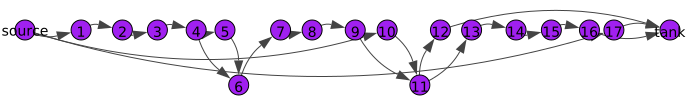

In [209]:
igraph.plot(g, autocurve=True, **visual_style)

# -------------------------------------------------------------------------------------


## Learning Gurobi road map

1. Quick Start Guide (Check Python Gurobi) https://www.gurobi.com/wp-content/plugins/hd_documentations/documentation/9.0/quickstart_linux.pdf

2. Example Tour (Check Python Gurobi) https://www.gurobi.com/wp-content/plugins/hd_documentations/documentation/9.0/examples.pdf

3. More examples https://www.gurobi.com/resource/jupyter-notebook-modeling-examples/

4. Google

# -------------------------------------------------------------------------------------

# References & resources

https://www.gurobi.com/resource/starting-with-gurobi/ <br/>
https://www.gurobi.com/documentation/9.0/refman/py_python_api_overview.html#sec:Python <br/>
https://www.gurobi.com/resource/python-i-webinar/ <br/>
https://www.gurobi.com/resource/modeling-with-the-gurobi-python-interface/ <br/>
https://www.gurobi.com/resource/modeling-examples-using-the-gurobi-python-api-in-jupyter-notebook/ <br/>
https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4